In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
len(X_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


60000

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

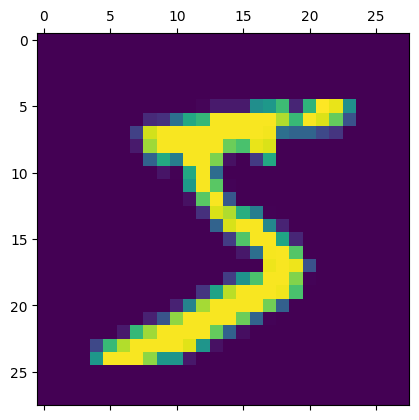

In [5]:
plt.matshow(X_train[0])

### Now we reshape the data(falttening) 

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [8]:
Model= keras.Sequential([
    keras.layers.Dense(100,input_dim=(784),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
Model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8739 - loss: 0.4518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9608 - loss: 0.1348
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9744 - loss: 0.0881
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9802 - loss: 0.0650
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.9861 - loss: 0.0495
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9879 - loss: 0.0387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0344
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.9924 - loss: 0.0272
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9939 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.9947 - loss: 0.0177


### Evaluate accuracy on test dataset 

In [10]:
Model.evaluate(X_test_flattened,Y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9740 - loss: 0.0945


[0.0795905739068985, 0.9782000184059143]

### Sample Prediction

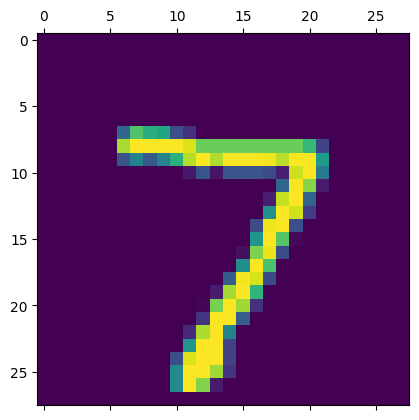

In [11]:
plt.matshow(X_test[0])

In [12]:
Y_predicted=Model.predict(X_test_flattened)
Y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


array([8.5129127e-02, 2.0079848e-05, 2.1151619e-01, 4.4616544e-01,
       3.5374310e-08, 7.6502816e-05, 1.1248613e-09, 9.9999899e-01,
       2.0147382e-01, 6.9184870e-02], dtype=float32)

In [13]:
#so we are not getting the one integer value thats why we use argmax.it will show us the highest value in that array
np.argmax(Y_predicted[0])

7

### Confusion Matrix

In [14]:
Y_predicted_labels=[np.argmax(i) for i in Y_predicted]

In [15]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

In [16]:
print(cm)

tf.Tensor(
[[ 973    1    0    2    0    1    1    1    1    0]
 [   0 1122    4    1    0    1    2    3    2    0]
 [   5    0 1010    3    1    0    2    5    6    0]
 [   1    0    3  989    0    8    0    5    3    1]
 [   3    0    3    1  954    0    6    2    2   11]
 [   3    1    0    5    0  876    2    1    3    1]
 [  11    2    2    1    1    2  936    0    3    0]
 [   2    3    7    4    0    0    0 1006    1    5]
 [   4    0    4   10    4    2    0    5  943    2]
 [   5    3    0    4    9    4    0    7    4  973]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'true values')

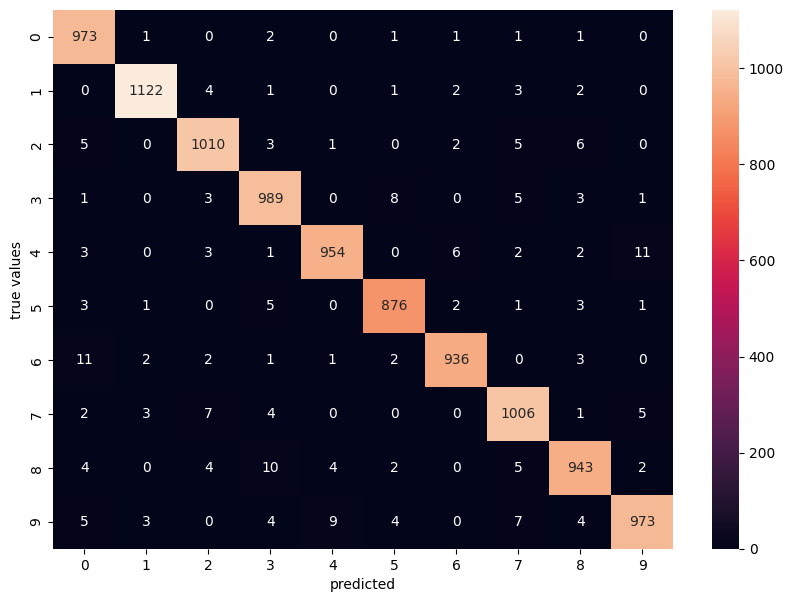

In [17]:
#now visualize
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true values')